In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols

In [2]:
df1 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/BMA.csv')
print(df1)

      Date VegID  PlotID  PairID   Latitude  Longitude  BenthoConc       ChlA  \
0   29-Sep    JR       1     1.0  31.420026 -81.289688        0.44   5.820868   
1   29-Sep    JR       2     2.0  31.420138 -81.289643        0.77   8.731303   
2   29-Sep    JR       3     3.0  31.420070 -81.289601        0.88  10.509901   
3   29-Sep    JR       4     4.0  31.420043 -81.289633        1.49   7.922849   
4   29-Sep    JR       5     5.0  31.419918 -81.289576        1.18  16.654151   
..     ...   ...     ...     ...        ...        ...         ...        ...   
95  21-May    SS       1     NaN        NaN        NaN         NaN  14.001049   
96  21-May    SS       2     NaN        NaN        NaN         NaN  21.001573   
97  21-May    SS       3     NaN        NaN        NaN         NaN   9.100682   
98  21-May    SS       4     NaN        NaN        NaN         NaN  10.734137   
99  21-May    SS       5     NaN        NaN        NaN         NaN  12.134242   

        Phaeo  Elevation   

In [3]:
#mud_df = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Mud.csv')
#mud_df['phaeo:chl'] = mud_df['Phaeo']/mud_df['ChlA']
#print(mud_df)

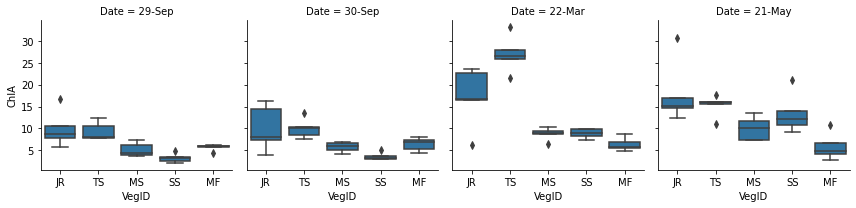

In [6]:
veg_plot = sns.FacetGrid(df1, col="Date", sharex=False)
veg_plot.map(sns.boxplot, 'VegID', 'ChlA', order=["JR", "TS", "MS", "SS", "MF"])
#veg_plot.savefig("chl.png", bbox_inches = 'tight')

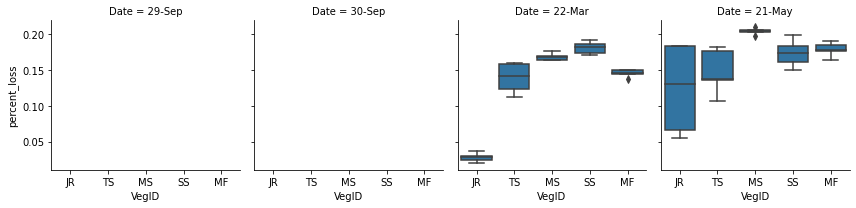

In [7]:
loi_plot = sns.FacetGrid(df1, col="Date", sharex=False)
loi_plot.map(sns.boxplot,'VegID', 'percent_loss', order=["JR", "TS", "MS", "SS", "MF"])
#veg_plot.savefig("chl.png", bbox_inches = 'tight')

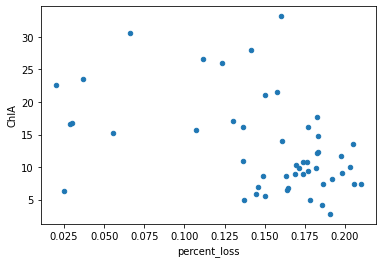

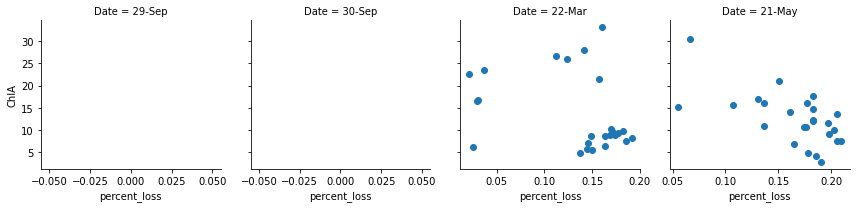

In [8]:
loi_chl = df1.plot(kind = 'scatter', x = 'percent_loss', y = 'ChlA')
#loi_chl

g = sns.FacetGrid(df1, col="Date", sharex=False)
g = g.map(plt.scatter, 'percent_loss', 'ChlA')

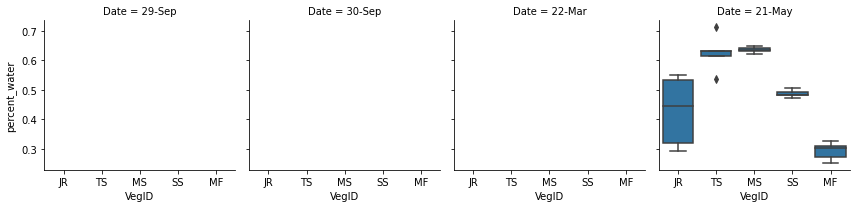

In [6]:
h2o_plot = sns.FacetGrid(df1, col="Date", sharex=False)
h2o_plot.map(sns.boxplot, 'VegID', 'percent_water', order=["JR", "TS", "MS", "SS", "MF"])
#veg_plot.savefig("chl.png", bbox_inches = 'tight')

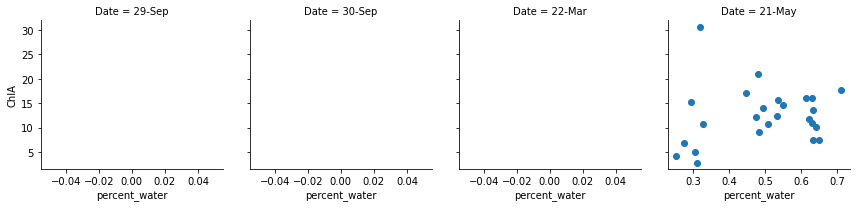

In [24]:
g = sns.FacetGrid(df1, col="Date", sharex=False)
g = g.map(plt.scatter, 'percent_water', 'ChlA')

#g = sns.FacetGrid(df1, col="Date", sharex=False)
#g = g.map(plt.scatter, 'percent_loss', 'percent_water')

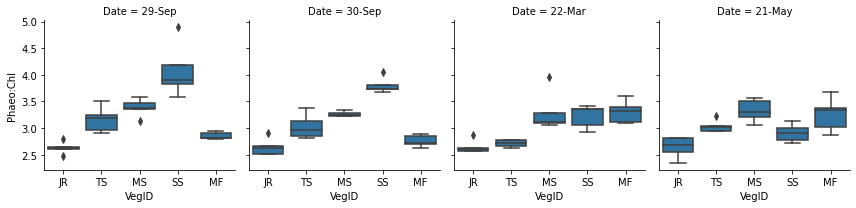

In [7]:
phaeo_plot = sns.FacetGrid(df1, col="Date", sharex=False)
phaeo_plot.map(sns.boxplot, 'VegID', 'Phaeo:Chl', order=["JR", "TS", "MS", "SS", "MF"])
#phaeo_plot.savefig("chl.png", bbox_inches = 'tight')

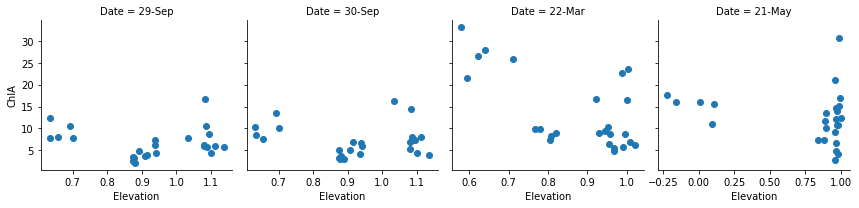

In [8]:
g = sns.FacetGrid(df1, col="Date", sharex=False)
g = g.map(plt.scatter, 'Elevation', 'ChlA')

<AxesSubplot:xlabel='Elevation', ylabel='ChlA'>

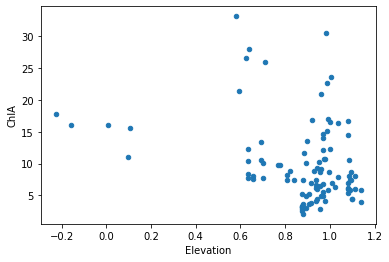

In [9]:
g_g = df1.plot(kind = 'scatter', x = 'Elevation', y = 'ChlA')
g_g

In [14]:
aov_chl = ols('ChlA ~ C(VegID) * C(Date)', data=df1).fit() #Specify C for Categorical
print(sm.stats.anova_lm(aov_chl, typ=2))

AttributeError: module 'statsmodels.formula.api' has no attribute 'stats'

In [11]:
print("hi")

hi
